# Unsupervised Learning: Trade & Ahead

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
# Installing the libraries with the specified version.

!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 yellowbrick==1.5 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 31.5 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.25.2 which is inco

In [ ]:
!jupyter nbconvert "/content/drive/MyDrive/McCombs Data Science/Unsupervised Learning/USL_Project_LearnerNotebook_FullCode-1.ipynb" --to html

[NbConvertApp] Converting notebook /content/drive/MyDrive/McCombs Data Science/Unsupervised Learning/USL_Project_LearnerNotebook_FullCode-1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 29 image(s).
[NbConvertApp] Writing 2943499 bytes to /content/drive/MyDrive/McCombs Data Science/Unsupervised Learning/USL_Project_LearnerNotebook_FullCode-1.html


In [ ]:
#Importing necessary libraries

#Libraries used for manipulating data
import pandas as pd
import numpy as np

#Libraries used for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries used for scaling the data
from sklearn.preprocessing import StandardScaler

#Libraries to build K means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#libraries to visualize K means clustering
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer

# to compute distances
from scipy.spatial.distance import cdist,pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # connecting to google drive

Mounted at /content/drive


In [ ]:
trade_data = pd.read_csv("/content/drive/MyDrive/McCombs Data Science/Unsupervised Learning/stock_data.csv")
trade_data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


## Data Overview

- Observations
- Sanity checks

In [ ]:
trade_data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [ ]:
trade_data.shape

(340, 15)

This dataset has 340 rows and 15 columns

In [ ]:
trade_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

Most of the columns are numeric


In [ ]:
trade_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.0,8.086234e+01,9.805509e+01,4.500000e+00,3.855500e+01,5.970500e+01,9.288000e+01,1.274950e+03
Price Change,340.0,4.078194e+00,1.200634e+01,-4.712969e+01,-9.394838e-01,4.819505e+00,1.069549e+01,5.505168e+01
Volatility,340.0,1.525976e+00,5.917984e-01,7.331632e-01,1.134878e+00,1.385593e+00,1.695549e+00,4.580042e+00
ROE,340.0,3.959706e+01,9.654754e+01,1.000000e+00,9.750000e+00,1.500000e+01,2.700000e+01,9.170000e+02
Cash Ratio,340.0,7.002353e+01,9.042133e+01,0.000000e+00,1.800000e+01,4.700000e+01,9.900000e+01,9.580000e+02
Net Cash Flow,340.0,5.553762e+07,1.946365e+09,-1.120800e+10,-1.939065e+08,2.098000e+06,1.698108e+08,2.076400e+10
Net Income,340.0,1.494385e+09,3.940150e+09,-2.352800e+10,3.523012e+08,7.073360e+08,1.899000e+09,2.444200e+10
Earnings Per Share,340.0,2.776662e+00,6.587779e+00,-6.120000e+01,1.557500e+00,2.895000e+00,4.620000e+00,5.009000e+01
Estimated Shares Outstanding,340.0,5.770283e+08,8.458496e+08,2.767216e+07,1.588482e+08,3.096751e+08,5.731175e+08,6.159292e+09
P/E Ratio,340.0,3.261256e+01,4.434873e+01,2.935451e+00,1.504465e+01,2.081988e+01,3.176476e+01,5.280391e+02


In [ ]:
trade_data.isnull().sum()

,0
Ticker Symbol,0
Security,0
GICS Sector,0
GICS Sub Industry,0
Current Price,0
Price Change,0
Volatility,0
ROE,0
Cash Ratio,0
Net Cash Flow,0


There are no null values

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Univariate Analysis

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

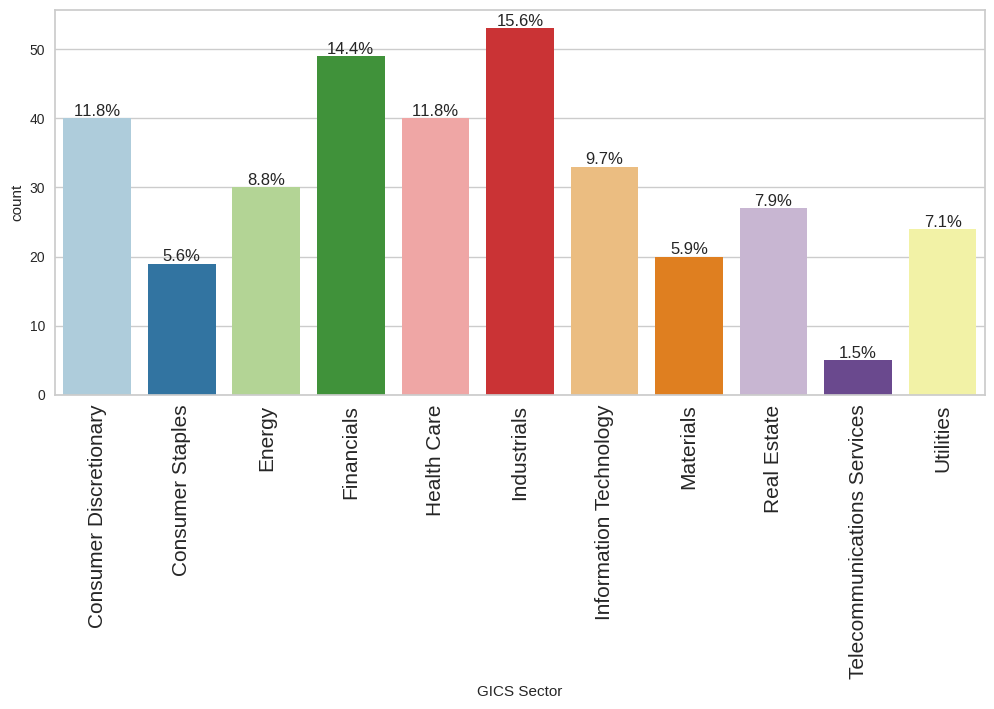

In [ ]:
labeled_barplot(trade_data,"GICS Sector",perc=True)

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
numeric_cols = trade_data.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['Current Price',
 'Price Change',
 'Volatility',
 'ROE',
 'Cash Ratio',
 'Net Cash Flow',
 'Net Income',
 'Earnings Per Share',
 'Estimated Shares Outstanding',
 'P/E Ratio',
 'P/B Ratio']

#### Current Price

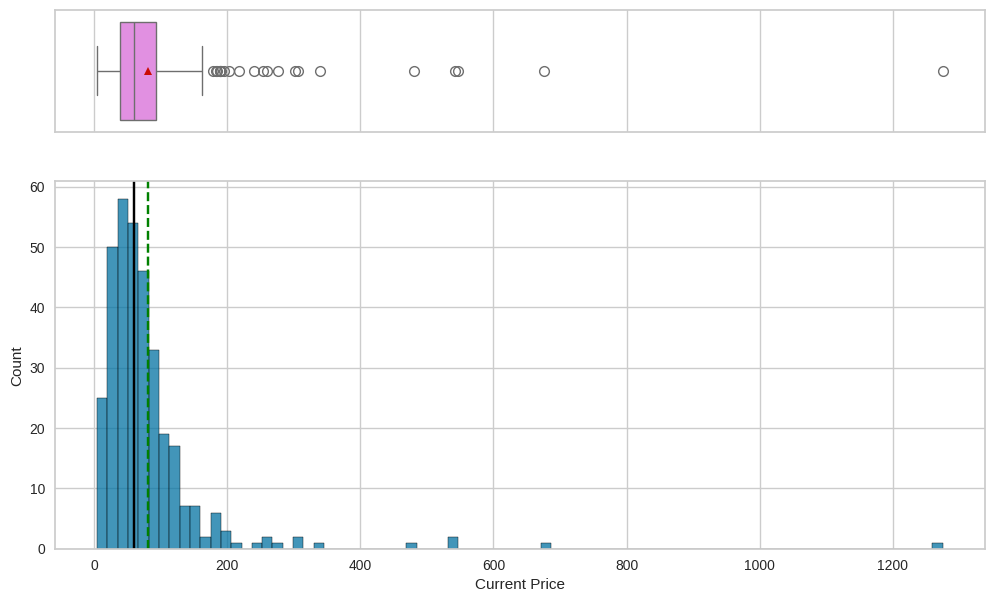

In [ ]:
histogram_boxplot(trade_data,"Current Price")

####Price Change

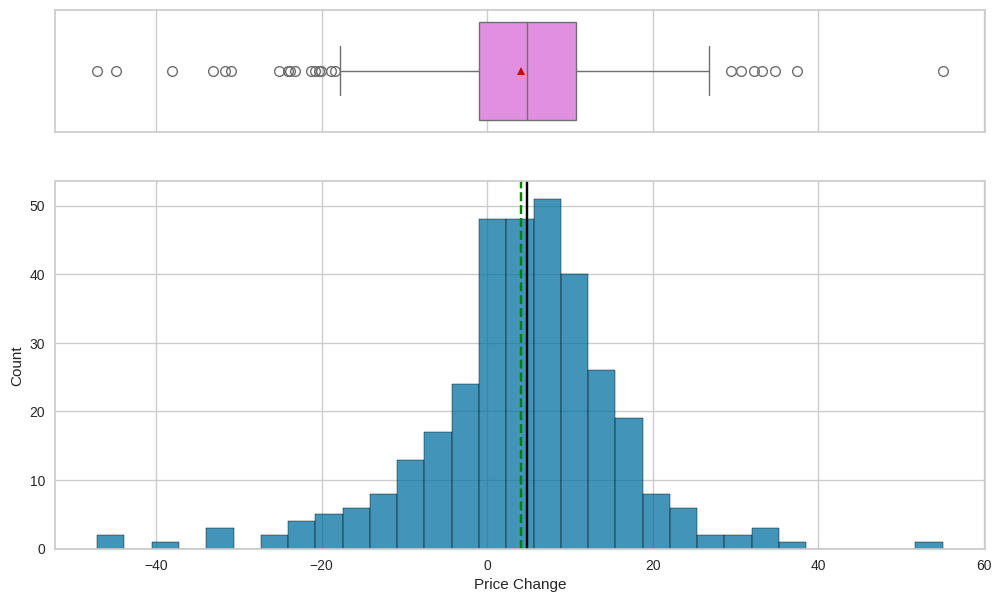

In [ ]:
histogram_boxplot(trade_data,"Price Change")

####Volatility

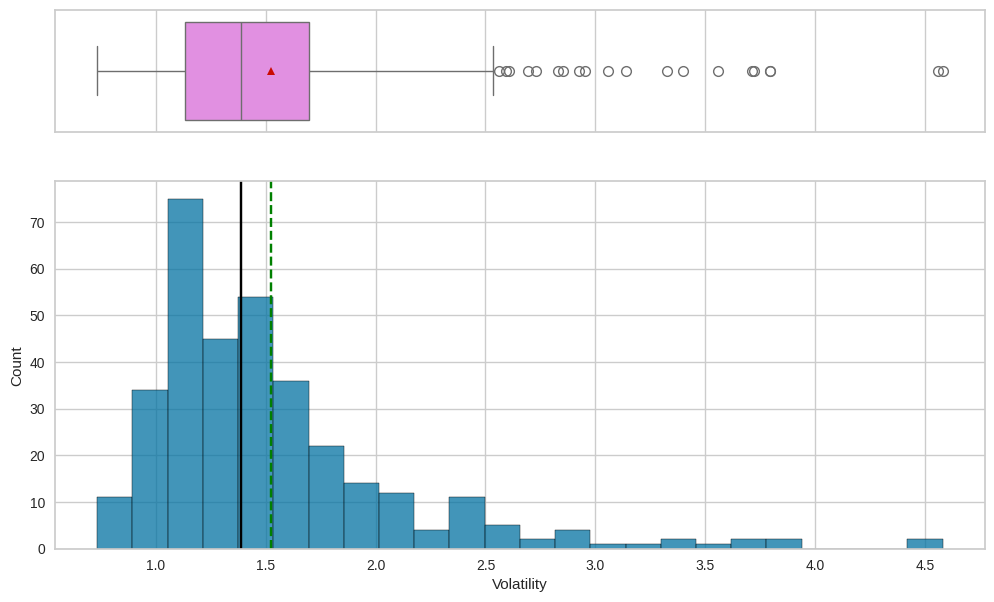

In [ ]:
histogram_boxplot(trade_data,"Volatility")

####ROE

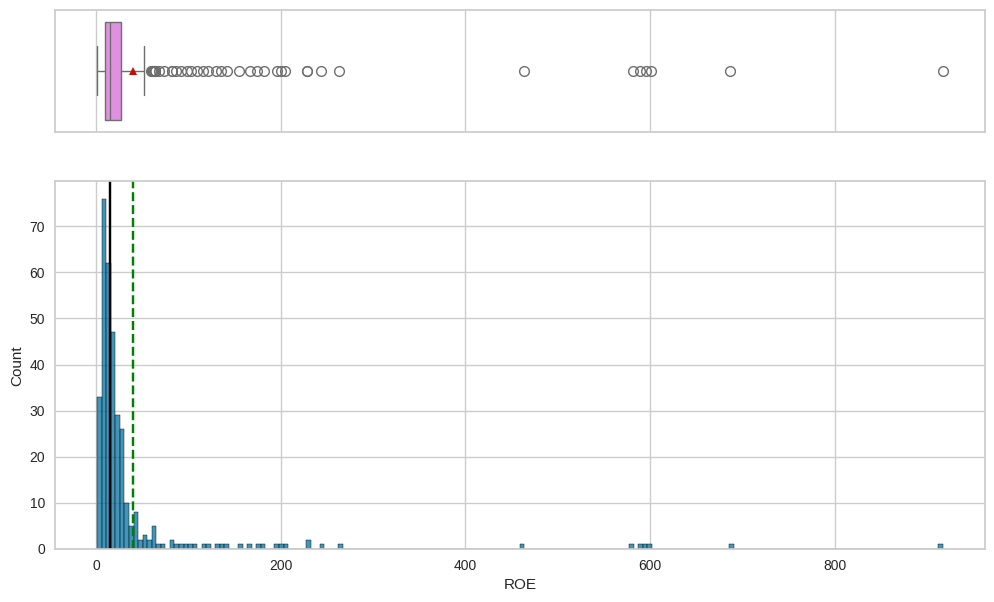

In [ ]:
histogram_boxplot(trade_data,"ROE")

####Cash Ratio

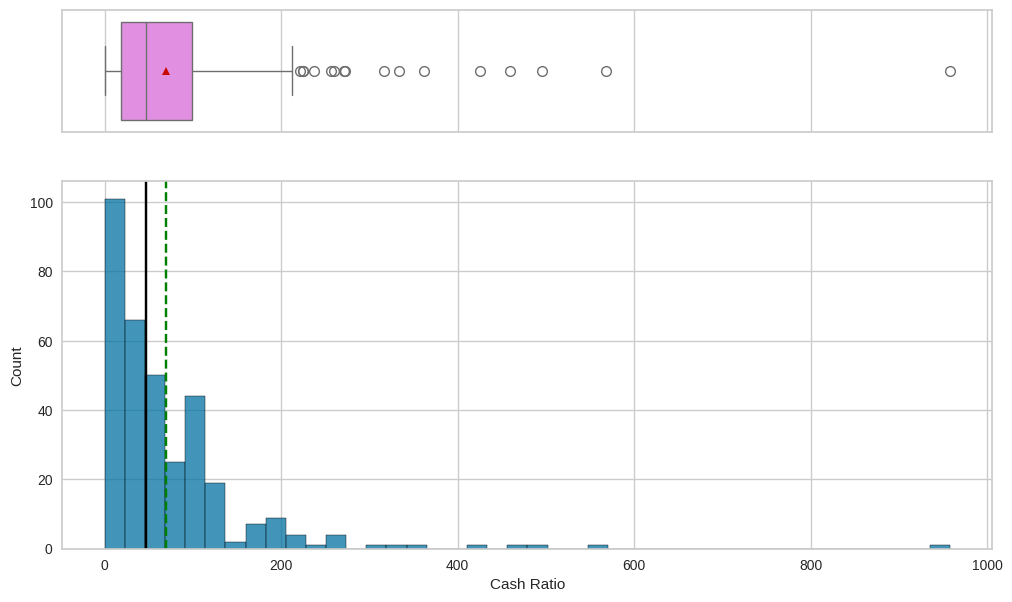

In [ ]:
histogram_boxplot(trade_data,"Cash Ratio")

####Net Cash Flow

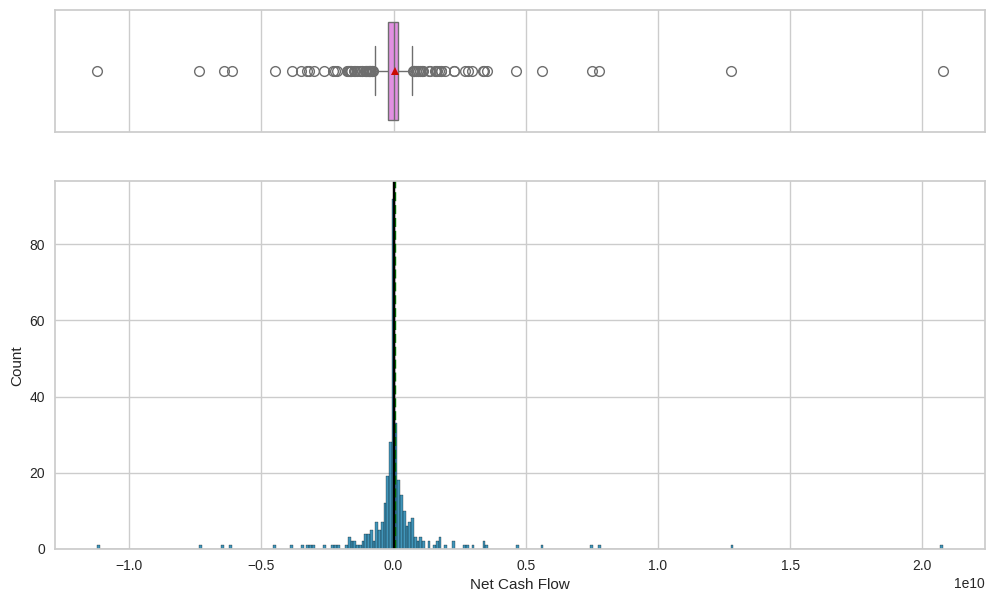

In [ ]:
histogram_boxplot(trade_data,"Net Cash Flow")

####Net Income

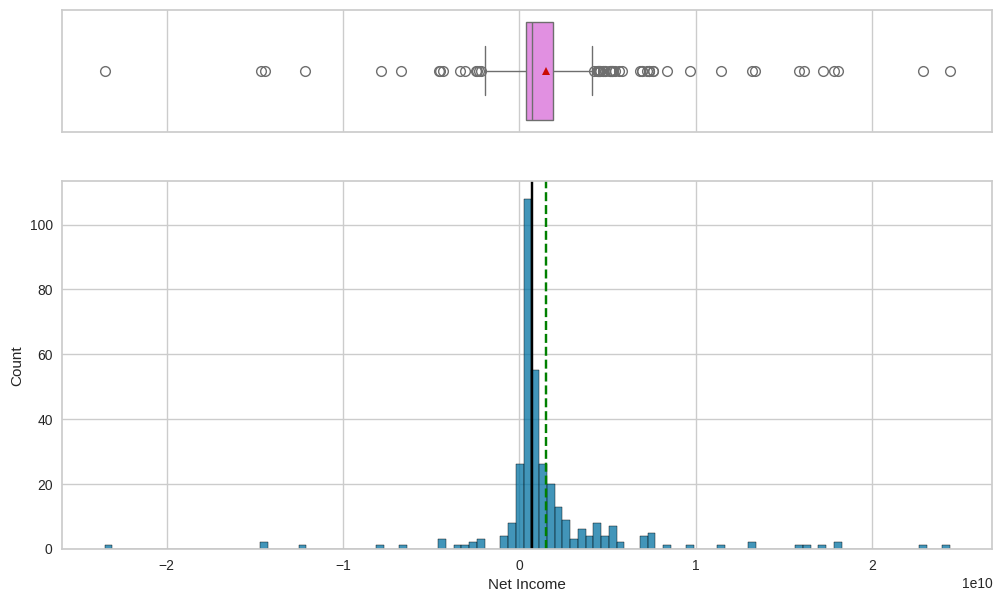

In [ ]:
histogram_boxplot(trade_data,"Net Income")

####Earnings Per Share

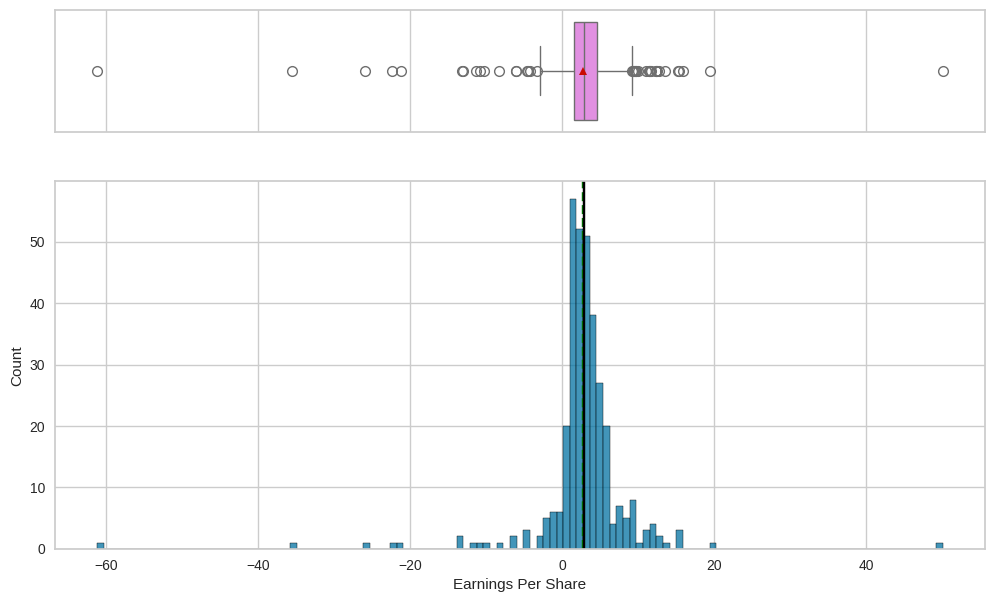

In [ ]:
histogram_boxplot(trade_data,"Earnings Per Share")

####Estimated Shares Outstanding

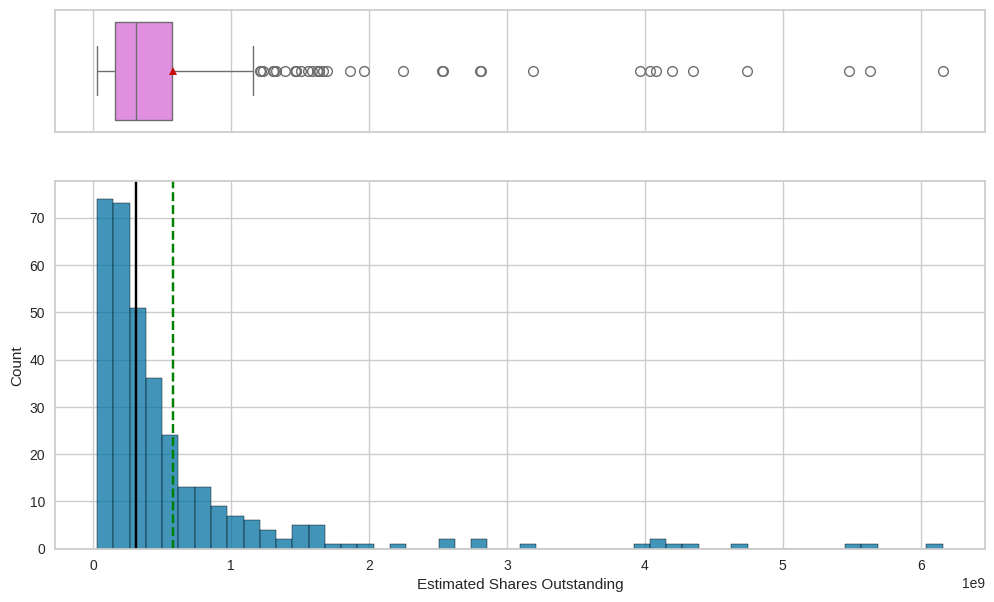

In [ ]:
histogram_boxplot(trade_data,"Estimated Shares Outstanding")

####P/E Ratio

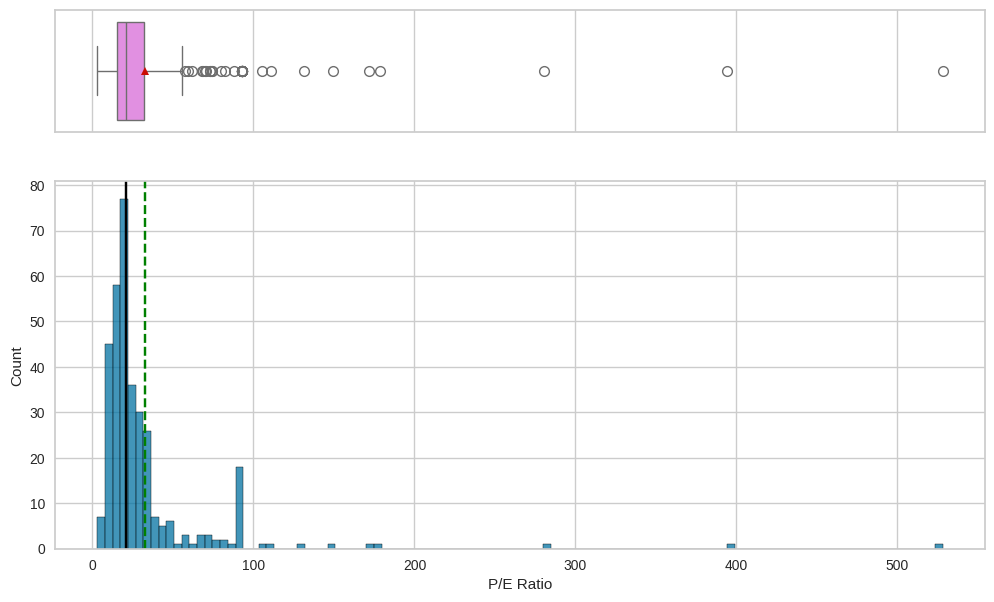

In [ ]:
histogram_boxplot(trade_data,"P/E Ratio")

####P/B Ratio

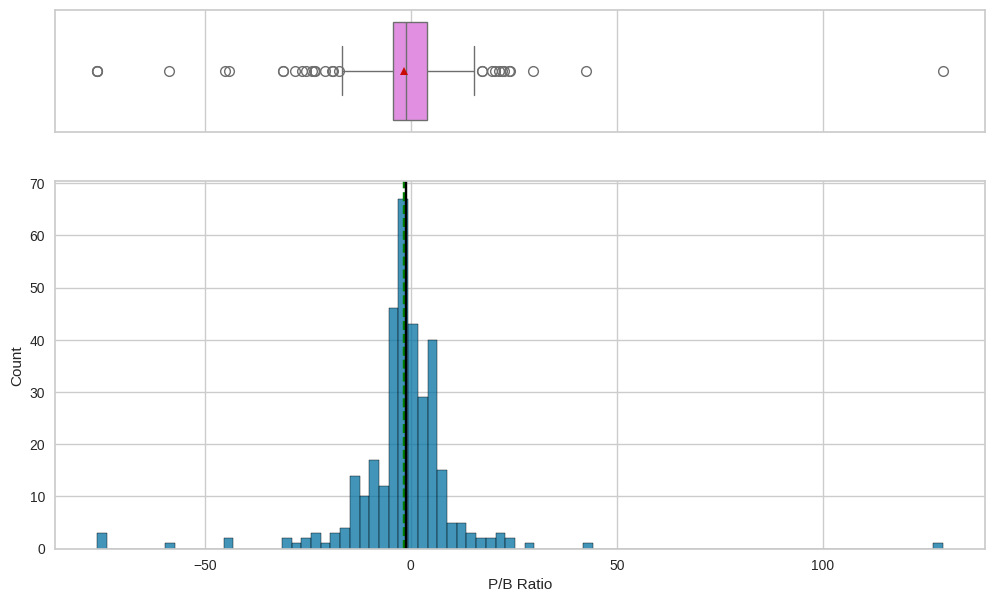

In [ ]:
histogram_boxplot(trade_data,"P/B Ratio")

### Bivariate Analysis

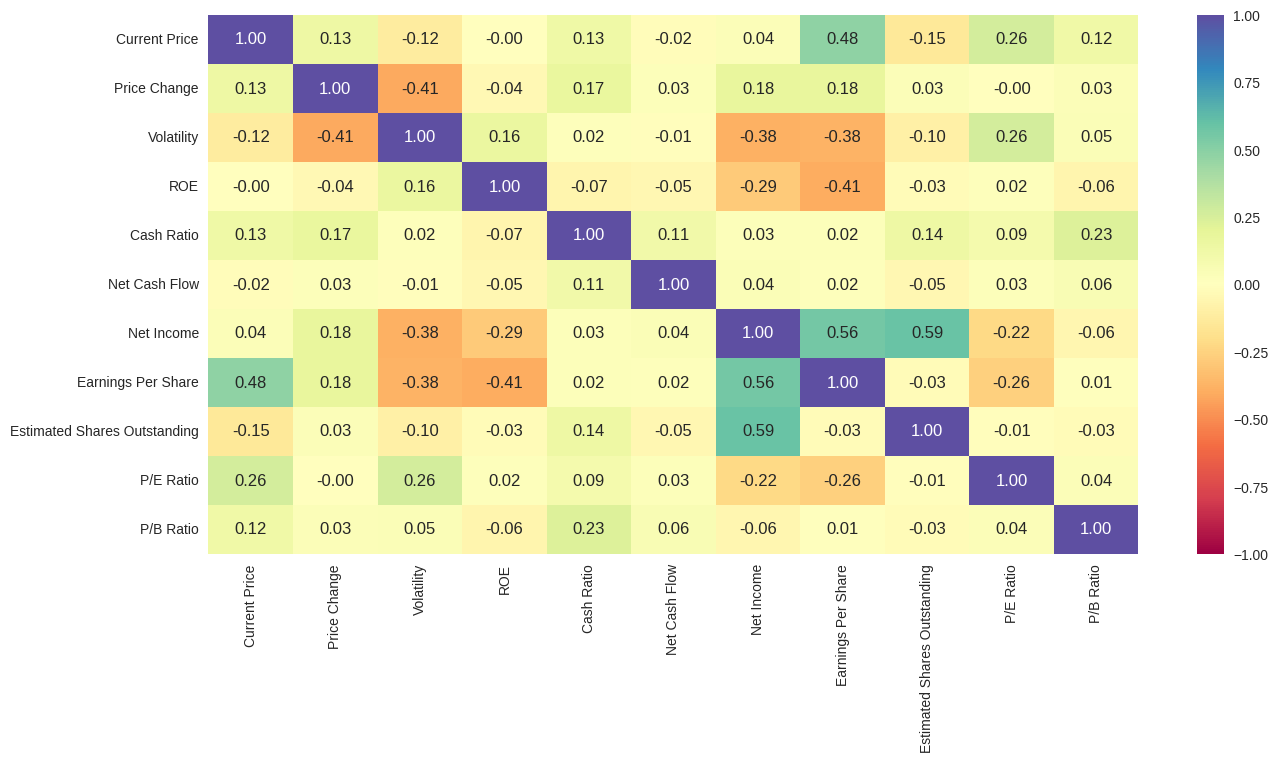

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(trade_data[numeric_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**The stocks of which economic sector have seen the maximum price increase on average?**

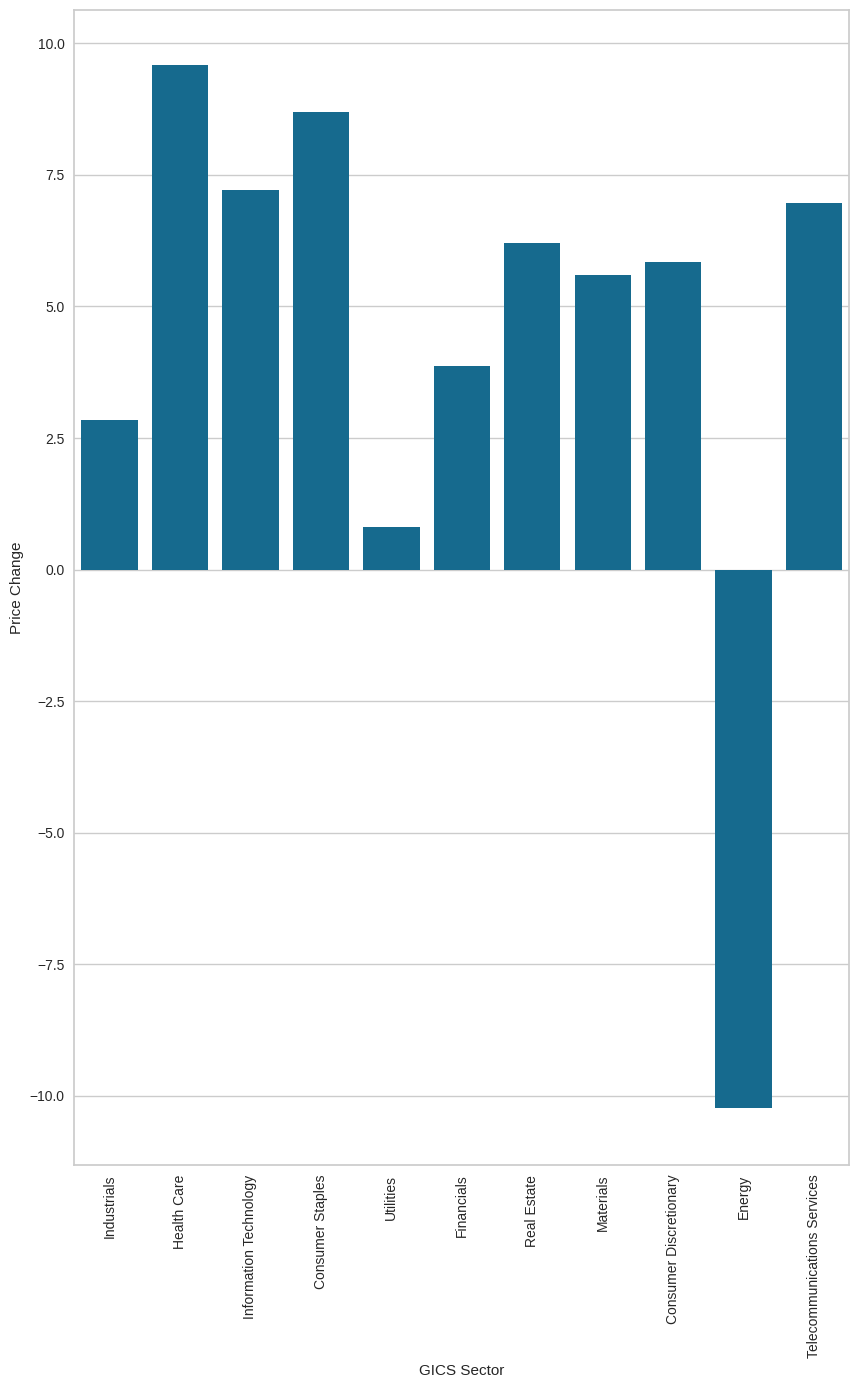

In [ ]:
plt.figure(figsize=(10,15))
sns.barplot(data=trade_data,x="GICS Sector",y="Price Change",ci=False)
plt.xticks(rotation=90)
plt.show()

The Health Care sector has the tallest bar, indicating the highest average price increase.

Consumer Staples and Information Technology also show strong gains.

The Energy sector has a clearly negative average price change, standing out with the lowest bar below zero.

**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?**

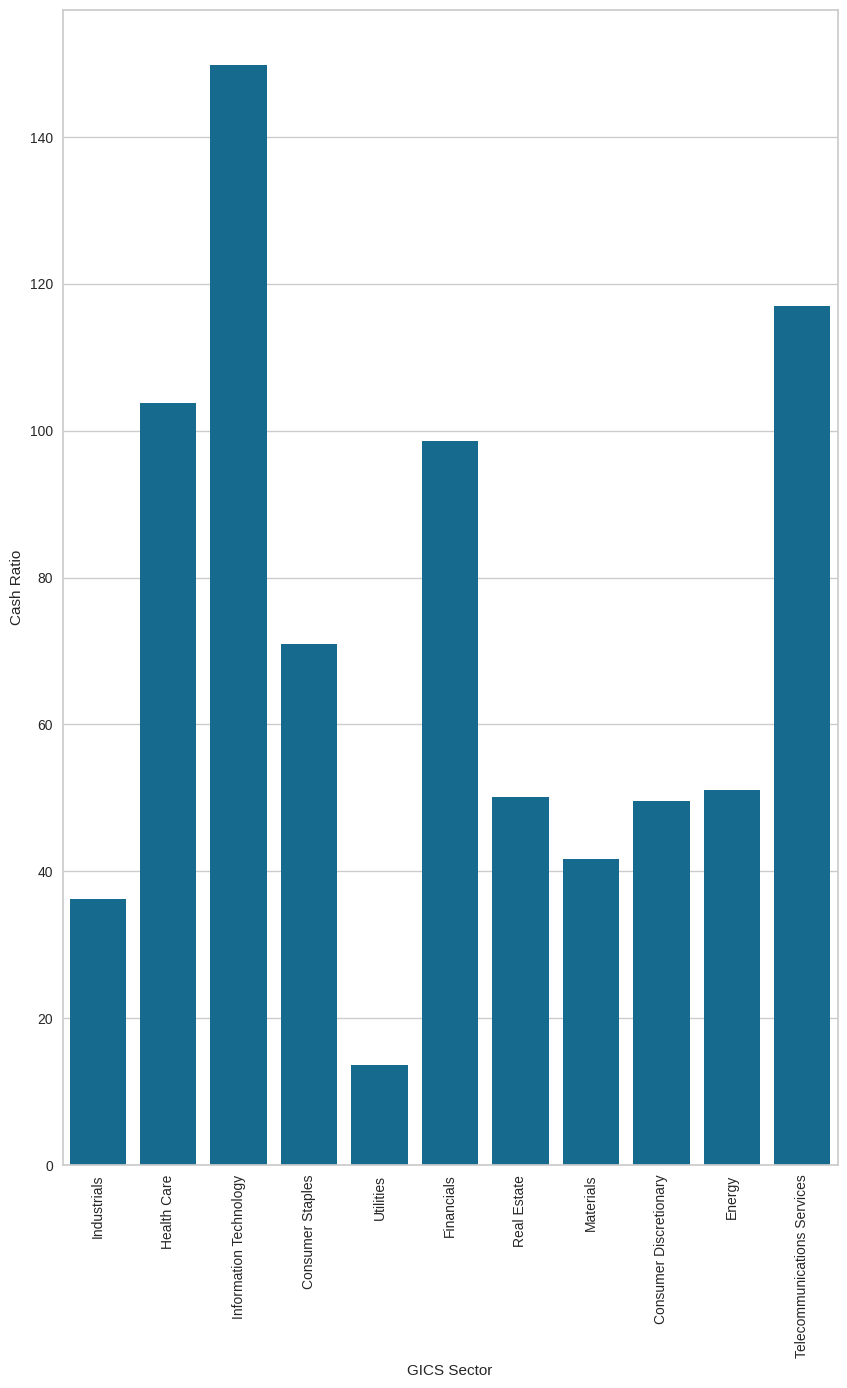

In [ ]:
plt.figure(figsize=(10,15))
sns.barplot(data=trade_data,x="GICS Sector",y="Cash Ratio",ci=False)
plt.xticks(rotation=90)
plt.show()

Highest average cash ratio is Information Technology, followed by Telecommunications,Health Care.

Lowest average cash ratio is Utilities. Industrials and Materials are also relatively low

**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?**

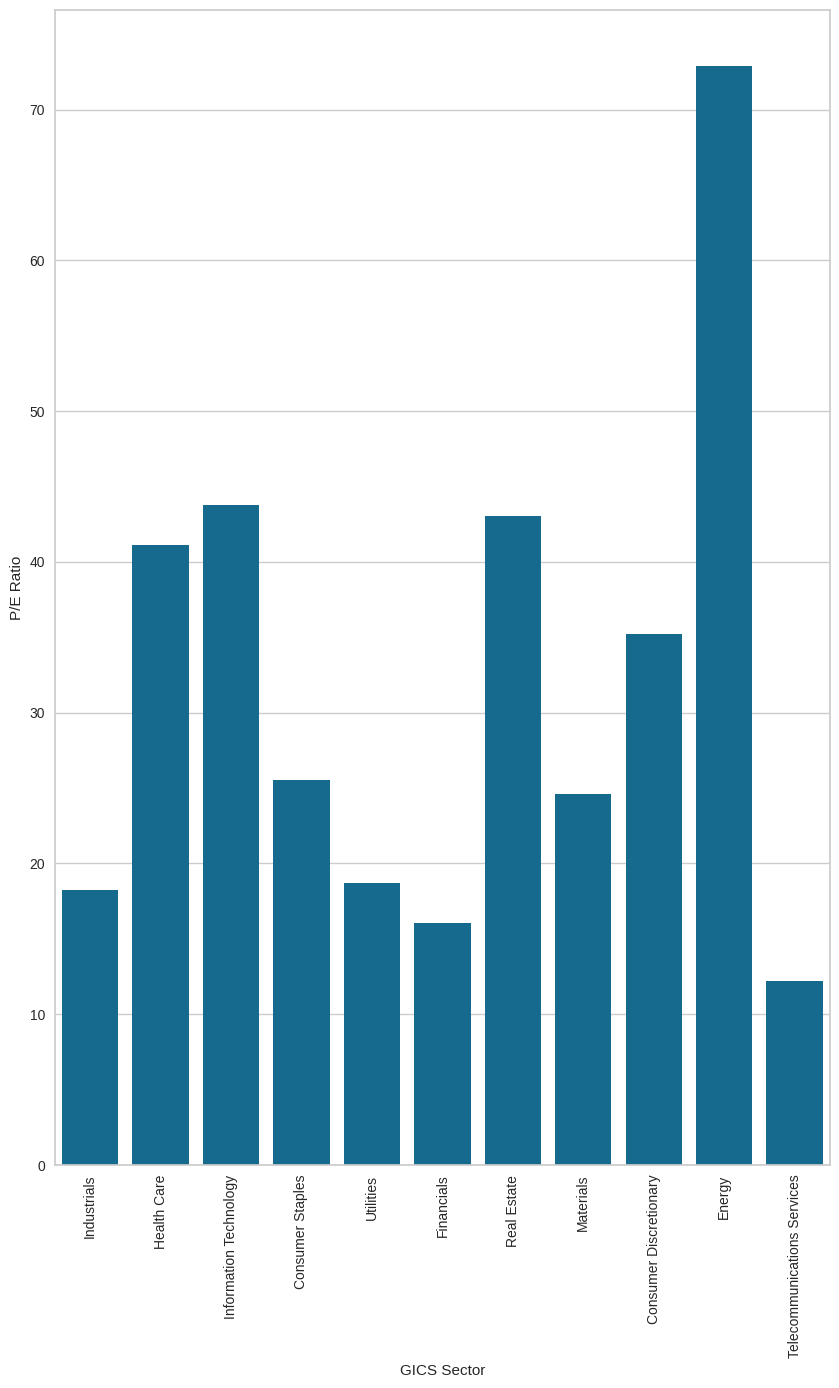

In [ ]:
plt.figure(figsize=(10,15))
sns.barplot(data=trade_data,x="GICS Sector",y="P/E Ratio",ci=False)
plt.xticks(rotation=90)
plt.show()

Highest average P/E ratio's are in Energy,Real Estate,Information technology.
Lowest average P/E ratio's are in Financials, Telecommunications Services,Industrails.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [ ]:
data = trade_data.copy()
data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


####Duplicate value check

In [ ]:
data.duplicated().sum()

np.int64(0)

There are no duplicate values

#### Missing Values

In [ ]:
data.isnull().sum()

,0
Ticker Symbol,0
Security,0
GICS Sector,0
GICS Sub Industry,0
Current Price,0
Price Change,0
Volatility,0
ROE,0
Cash Ratio,0
Net Cash Flow,0


There are no missing values

#### Outlier check

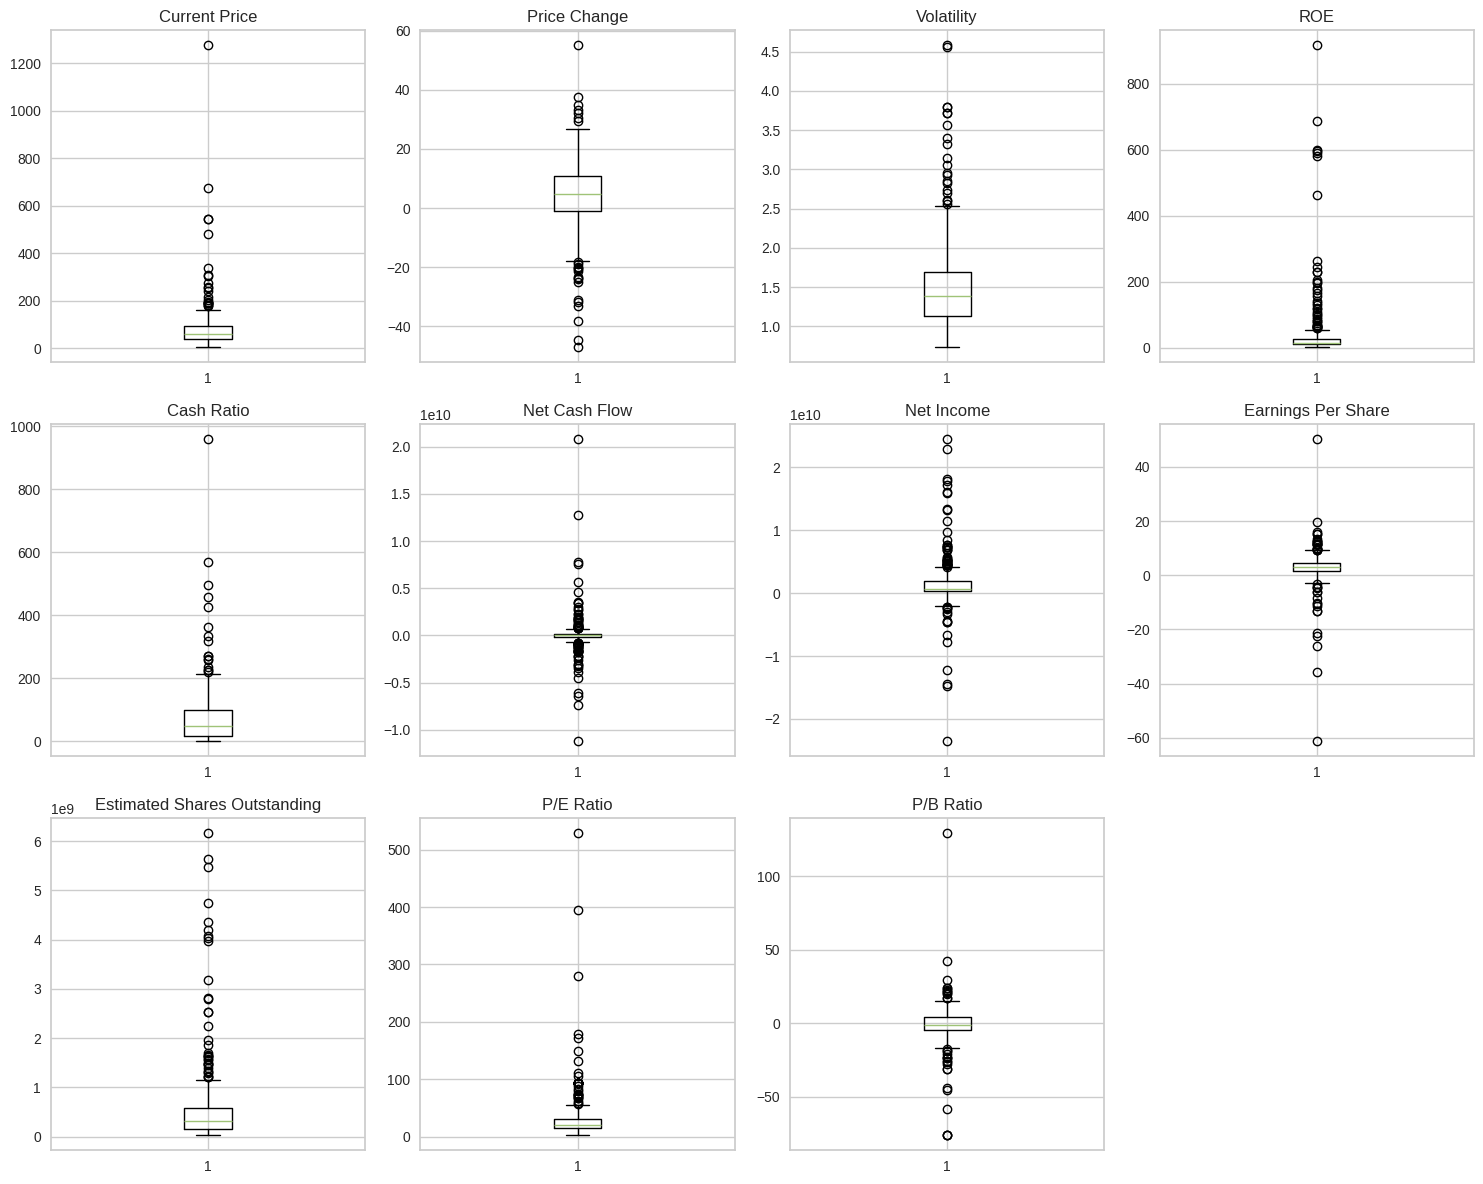

In [ ]:
plt.figure(figsize=(15, 12))

numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Columns has outliers, but we choose not to treat them

#### Scaling of data

In [ ]:
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['Current Price',
 'Price Change',
 'Volatility',
 'ROE',
 'Cash Ratio',
 'Net Cash Flow',
 'Net Income',
 'Earnings Per Share',
 'Estimated Shares Outstanding',
 'P/E Ratio',
 'P/B Ratio']

In [ ]:
scaler = StandardScaler()
subset = data[numeric_cols].copy()
scaled_data = scaler.fit_transform(subset)


In [ ]:
scaled_data = pd.DataFrame(scaled_data,columns=numeric_cols)
scaled_data.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


All the values are scaled to same range

## EDA

- It is a good idea to explore the data once again after manipulating it.

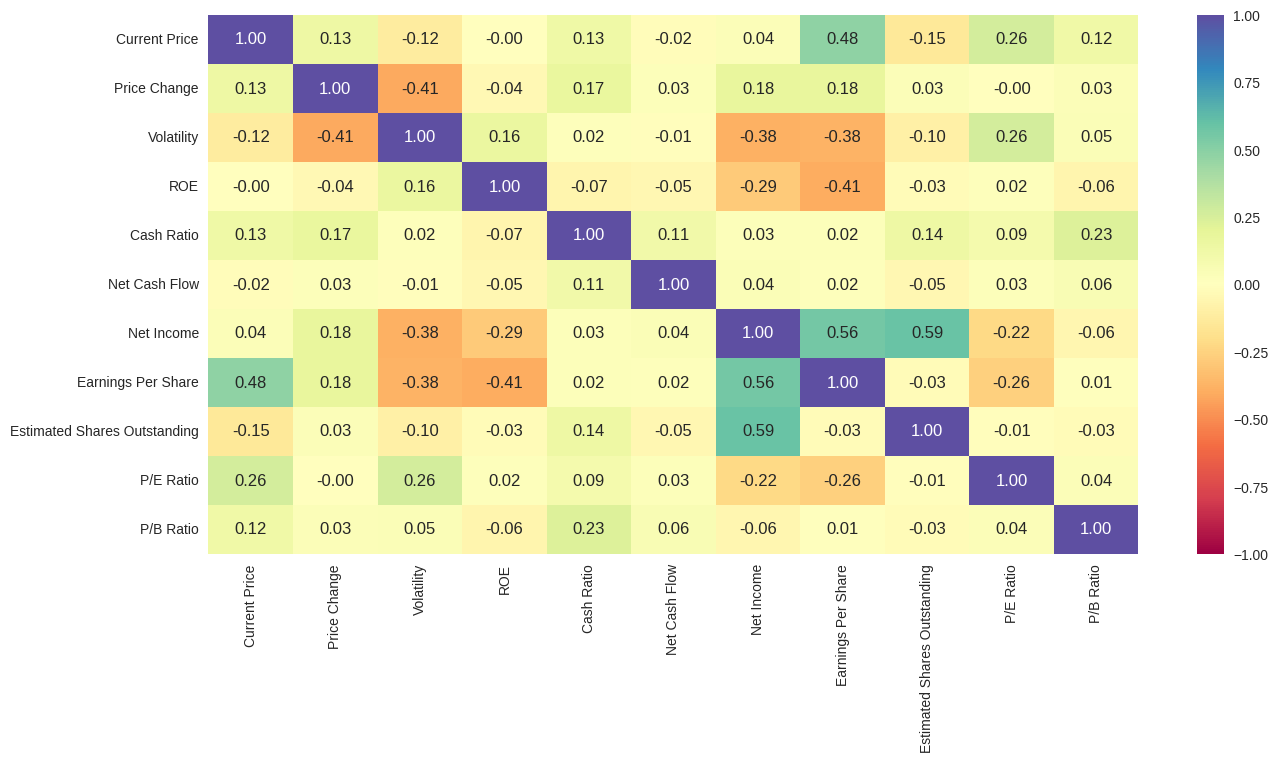

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(scaled_data[numeric_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## K-means Clustering

In [ ]:
k_means_data = scaled_data.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.3392053626003
Number of Clusters: 4 	Average Distortion: 2.216620943812342
Number of Clusters: 5 	Average Distortion: 2.127175929972344
Number of Clusters: 6 	Average Distortion: 2.0723738672809824
Number of Clusters: 7 	Average Distortion: 2.1236500018610274
Number of Clusters: 8 	Average Distortion: 1.9822833821723336
Number of Clusters: 9 	Average Distortion: 1.9564250863749266
Number of Clusters: 10 	Average Distortion: 1.8772160856503373
Number of Clusters: 11 	Average Distortion: 1.8047982978776742
Number of Clusters: 12 	Average Distortion: 1.7606904627313262
Number of Clusters: 13 	Average Distortion: 1.7702643188060756
Number of Clusters: 14 	Average Distortion: 1.7285240178308205


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

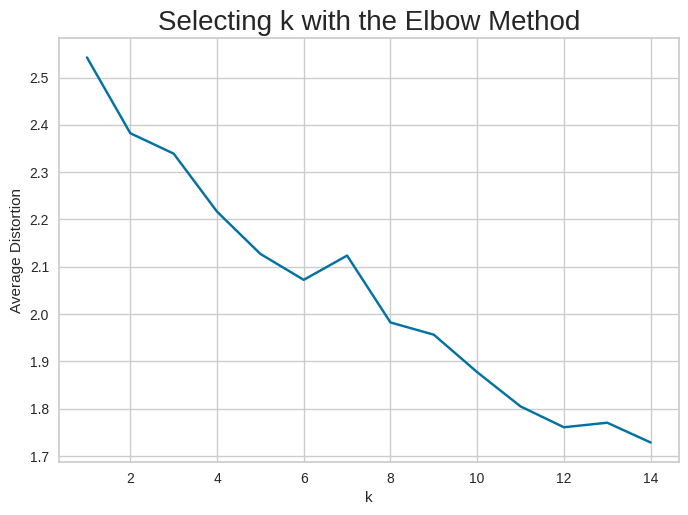

In [ ]:
clusters = range(1,15)
meandistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(k_means_data)
    prediction = model.predict(k_means_data)
    distortion = (
        sum(
            np.min(cdist(k_means_data, model.cluster_centers_, "euclidean"), axis=1)
        )
        / k_means_data.shape[0]
    )

    meandistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meandistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

It shows that 8 to 9 clusters are ideal number of clusters.

For n_clusters = 2, silhouette score is 0.46460461117703467
For n_clusters = 3, silhouette score is 0.4591929100168394
For n_clusters = 4, silhouette score is 0.39849578416389525
For n_clusters = 5, silhouette score is 0.42967350419881634
For n_clusters = 6, silhouette score is 0.41532375559349605
For n_clusters = 7, silhouette score is 0.11905704984541814
For n_clusters = 8, silhouette score is 0.43048216228341
For n_clusters = 9, silhouette score is 0.14853649006800992
For n_clusters = 10, silhouette score is 0.1142625026737078
For n_clusters = 11, silhouette score is 0.15504256843998898
For n_clusters = 12, silhouette score is 0.16451747175284095
For n_clusters = 13, silhouette score is 0.16663813521415402
For n_clusters = 14, silhouette score is 0.13756750151990485


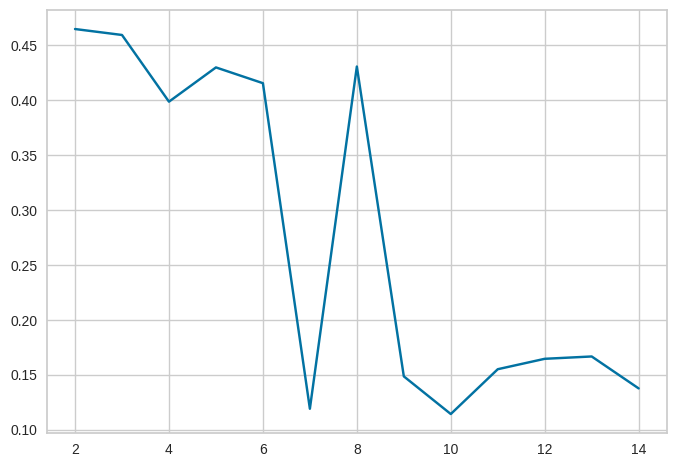

In [ ]:
sil_score = []
cluster_list = list(range(2, 15))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((k_means_data))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(k_means_data, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

Based on the silhouette method, the optimal number of clusters is 4, even though the elbow method earlier suggested around 8–9.

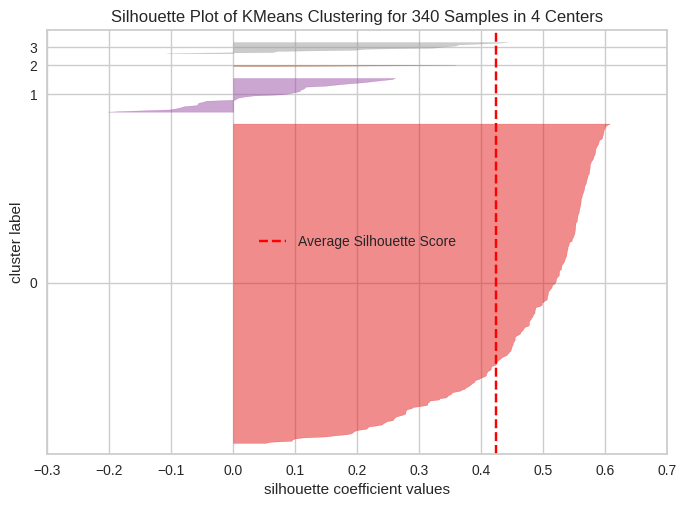

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(k_means_data)
visualizer.show()

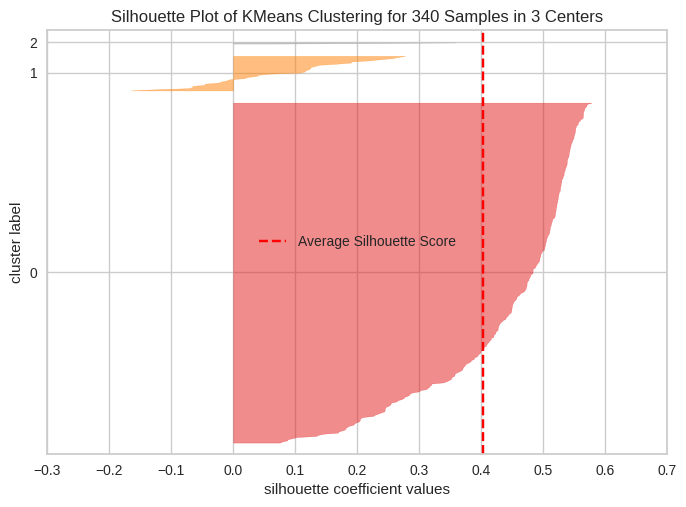

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(k_means_data)
visualizer.show()

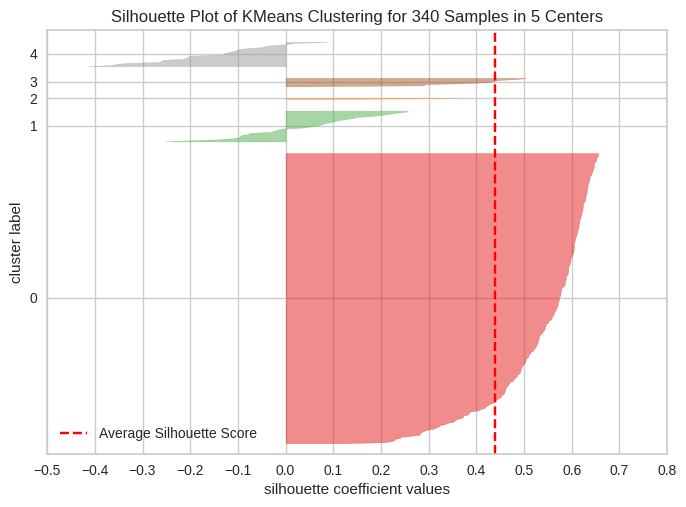

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(k_means_data)
visualizer.show()

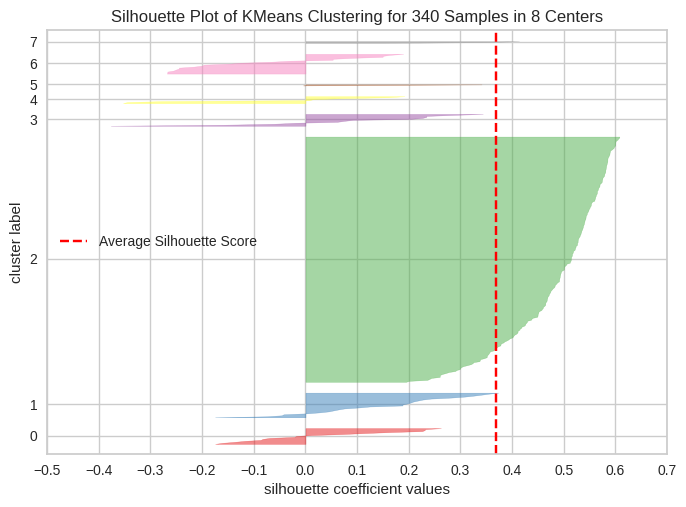

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(k_means_data)
visualizer.show()

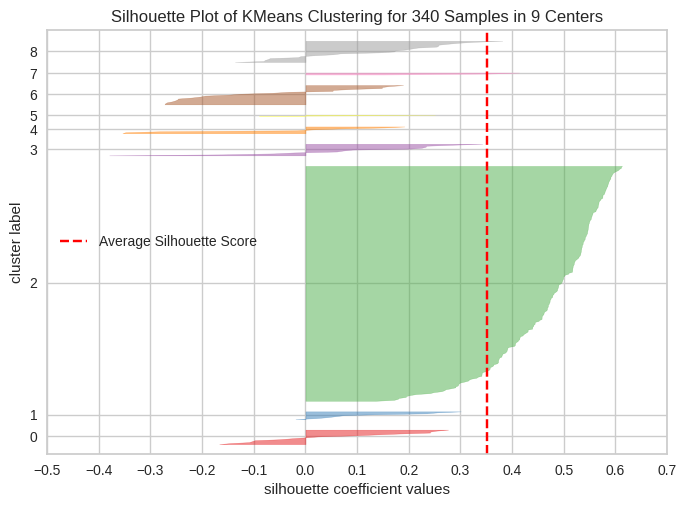

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(9, random_state=1))
visualizer.fit(k_means_data)
visualizer.show()

The Silhouette Visualizer confirms that **k = 4** is a strong choice, with a high average silhouette score (\~0.45) and well-separated clusters. Most samples are well-clustered, with only a few showing minor misclassification. This suggests stable and interpretable results, though k = 3 or 5 can be tested for fine-tuning if needed.


### Creating Final Model

In [ ]:
KMeans_model = KMeans(n_clusters=4,random_state=1)
KMeans_model.fit(k_means_data)

KMeans(n_clusters=4, random_state=1)

In [ ]:
# creating a copy of the original data
data = trade_data.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_data["KM_segments"] = KMeans_model.labels_
data["KM_segments"] = KMeans_model.labels_

### Cluster Profiling

In [ ]:
cluster_profile = k_means_data.groupby("KM_segments").mean()

In [ ]:
cluster_profile["count_in_each_segment"] = (
    data.groupby("KM_segments")["Security"].count().values  ## Complete the code to groupby the cluster labels
)

In [ ]:
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,0.033850,0.135509,-0.218879,-0.058444,-0.000561,0.017967,0.005934,0.169309,-0.157337,-0.179918,-0.021288,295
1,-0.169531,-1.206220,2.040956,0.074845,-0.004068,0.077196,-0.892865,-1.209144,-0.060048,1.757149,0.251388,32
2,-0.575803,-1.453888,3.311126,7.908297,-0.210698,-0.693613,-5.236157,-6.778822,-0.068025,0.635362,0.235430,2
3,-0.309926,0.139248,-0.669418,-0.088233,0.065186,-0.580298,3.390319,0.209466,4.406556,-0.402159,-0.203198,11


In [ ]:
cluster_profile.style.highlight_min(color="red", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,0.033850,0.135509,-0.218879,-0.058444,-0.000561,0.017967,0.005934,0.169309,-0.157337,-0.179918,-0.021288,295
1,-0.169531,-1.206220,2.040956,0.074845,-0.004068,0.077196,-0.892865,-1.209144,-0.060048,1.757149,0.251388,32
2,-0.575803,-1.453888,3.311126,7.908297,-0.210698,-0.693613,-5.236157,-6.778822,-0.068025,0.635362,0.235430,2
3,-0.309926,0.139248,-0.669418,-0.088233,0.065186,-0.580298,3.390319,0.209466,4.406556,-0.402159,-0.203198,11


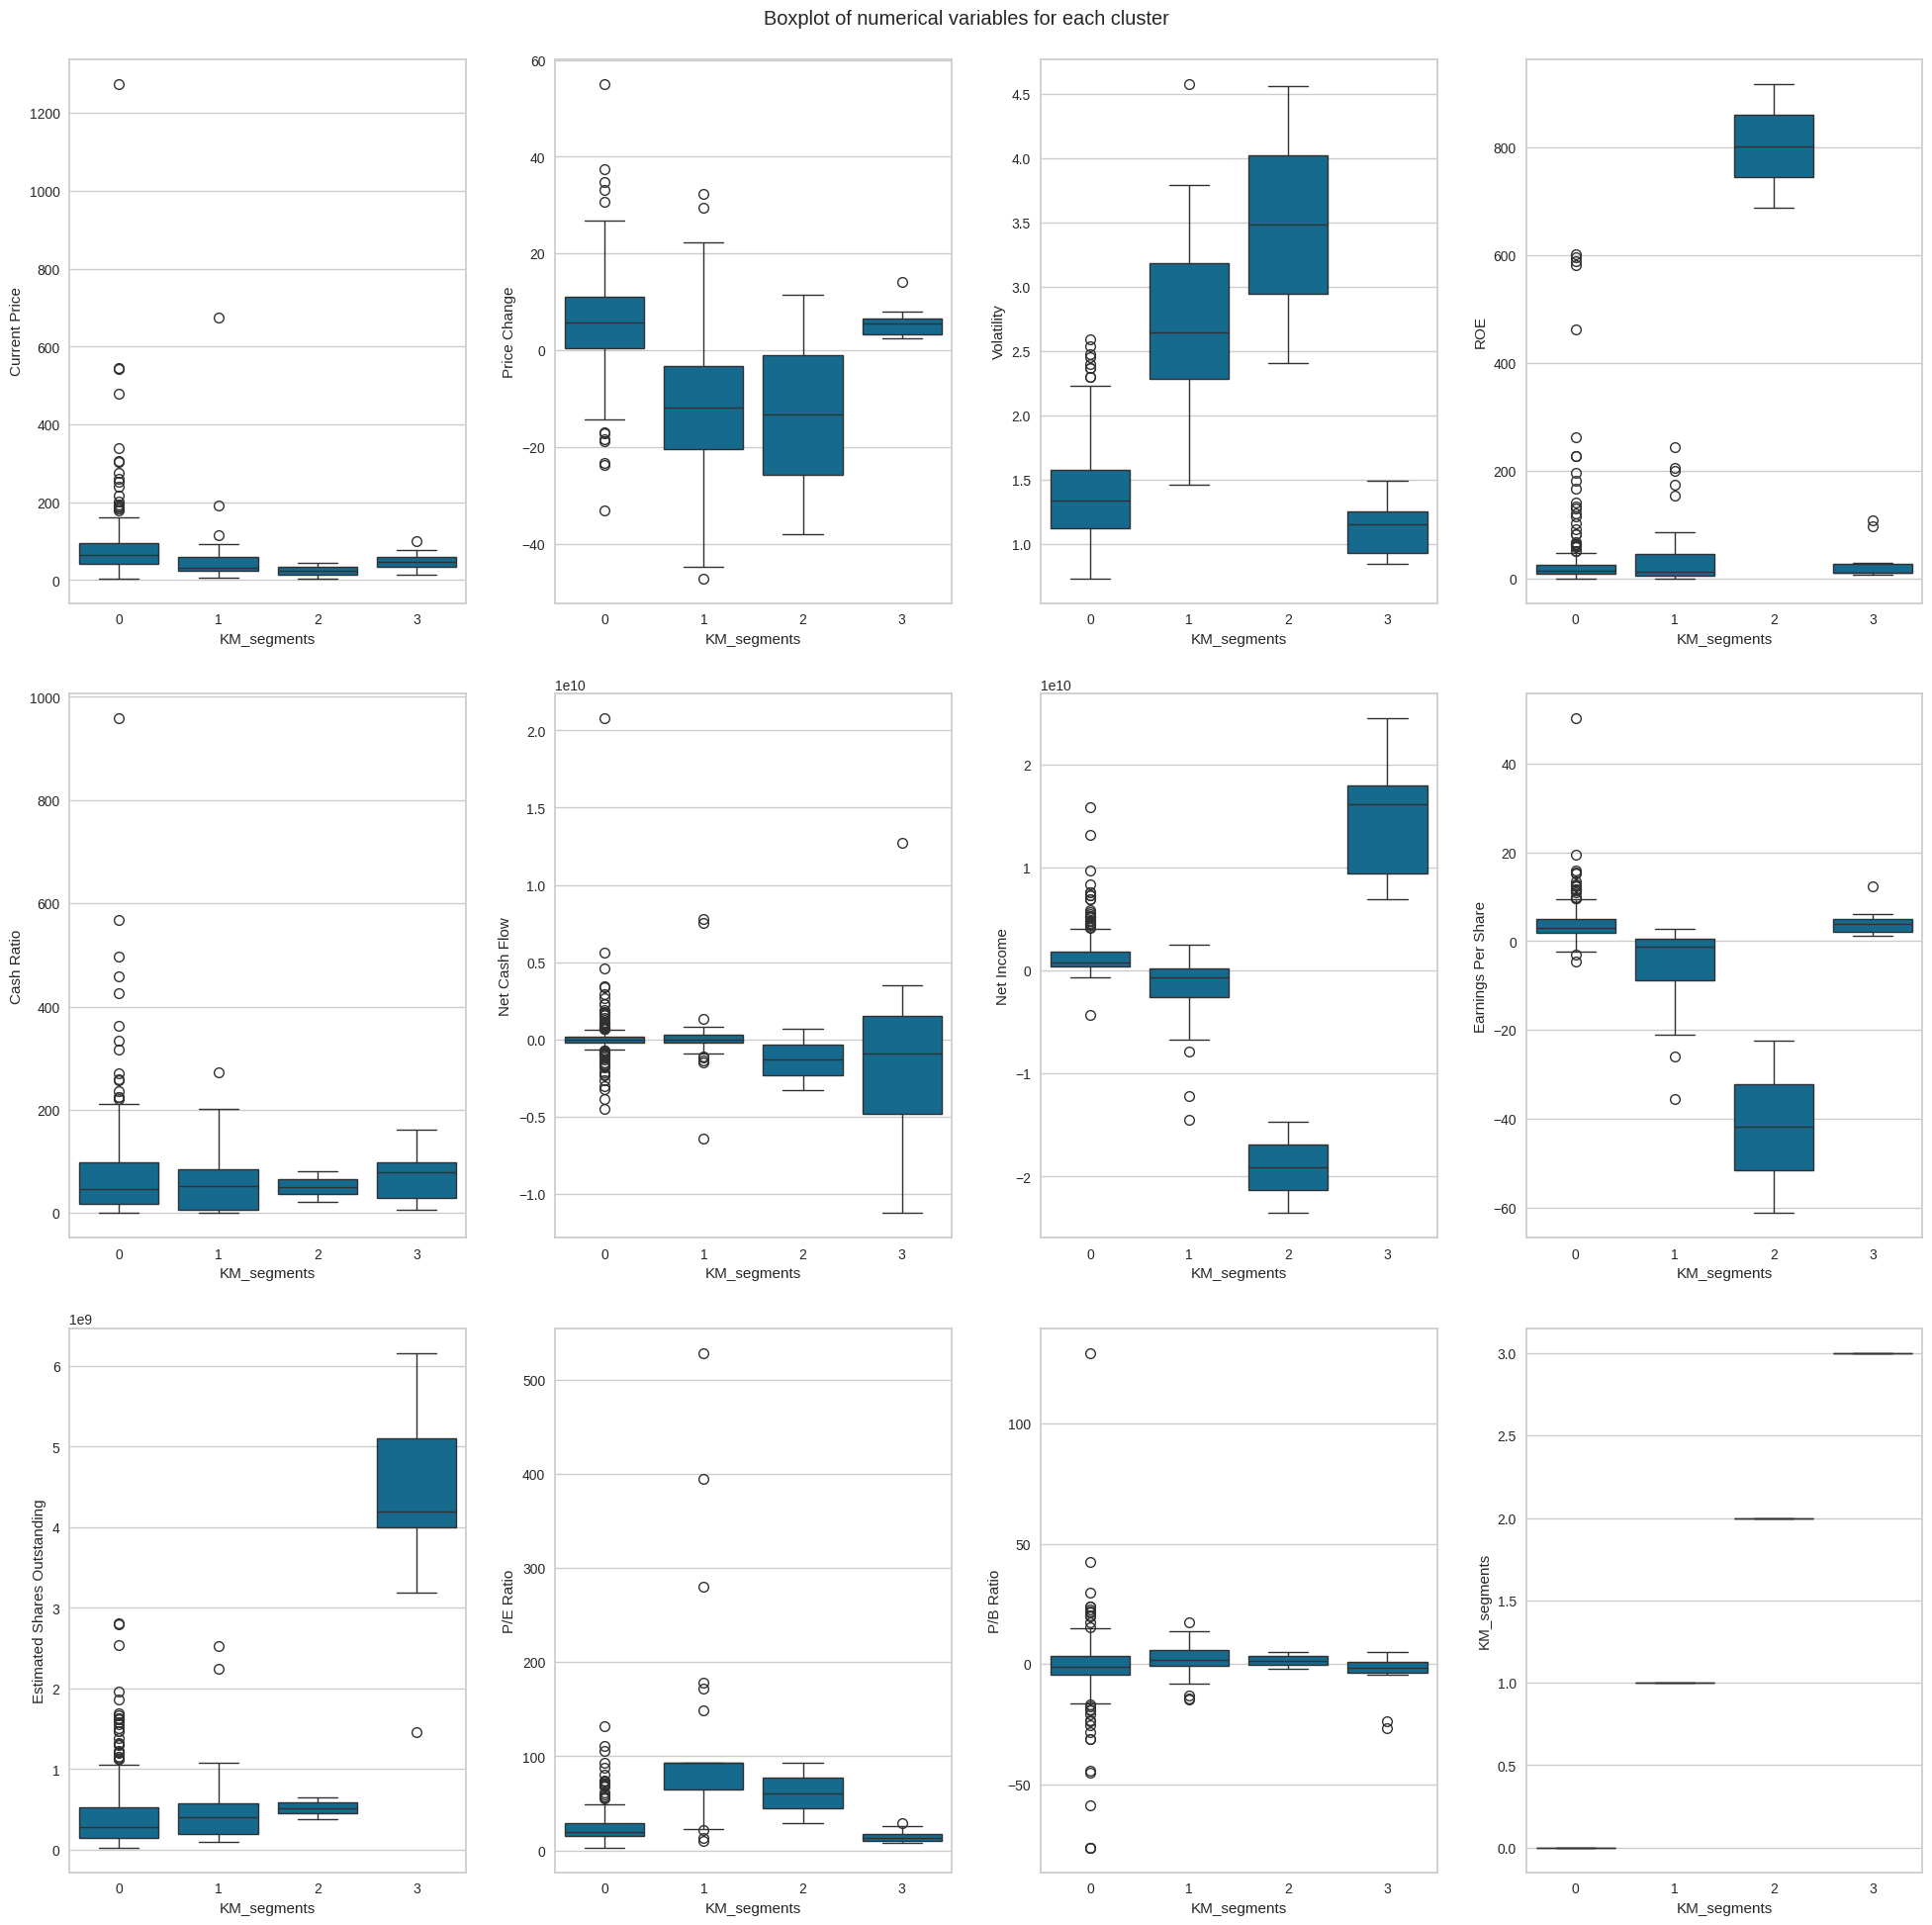

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = data.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=data, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

<Axes: xlabel='KM_segments,GICS Sector'>

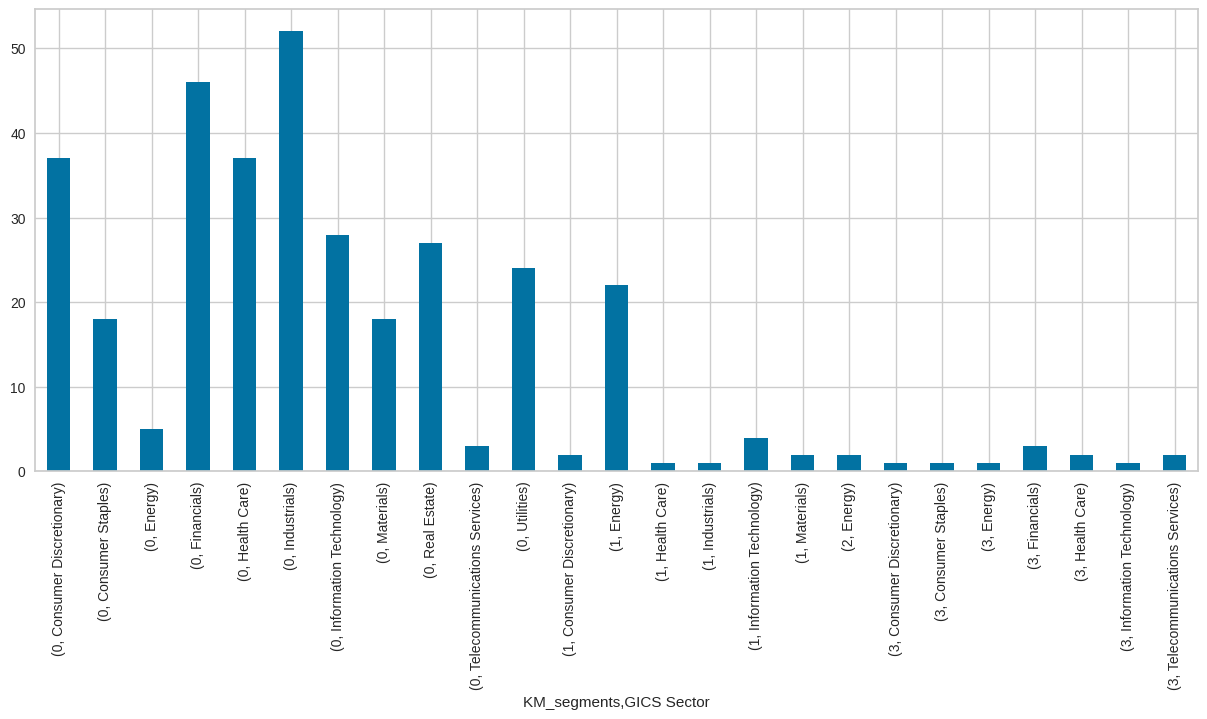

In [ ]:
data.groupby(["KM_segments", "GICS Sector"])['Security'].count().plot.bar(figsize=(15, 6))

## Hierarchical Clustering

#### Checking Cophenetic Correlation

In [ ]:
hc_scaled_data = scaled_data.copy()

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_scaled_data, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_scaled_data))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


**Let's Explore different linkage methods with Euclidean Distance**

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_scaled_data, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_scaled_data))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.

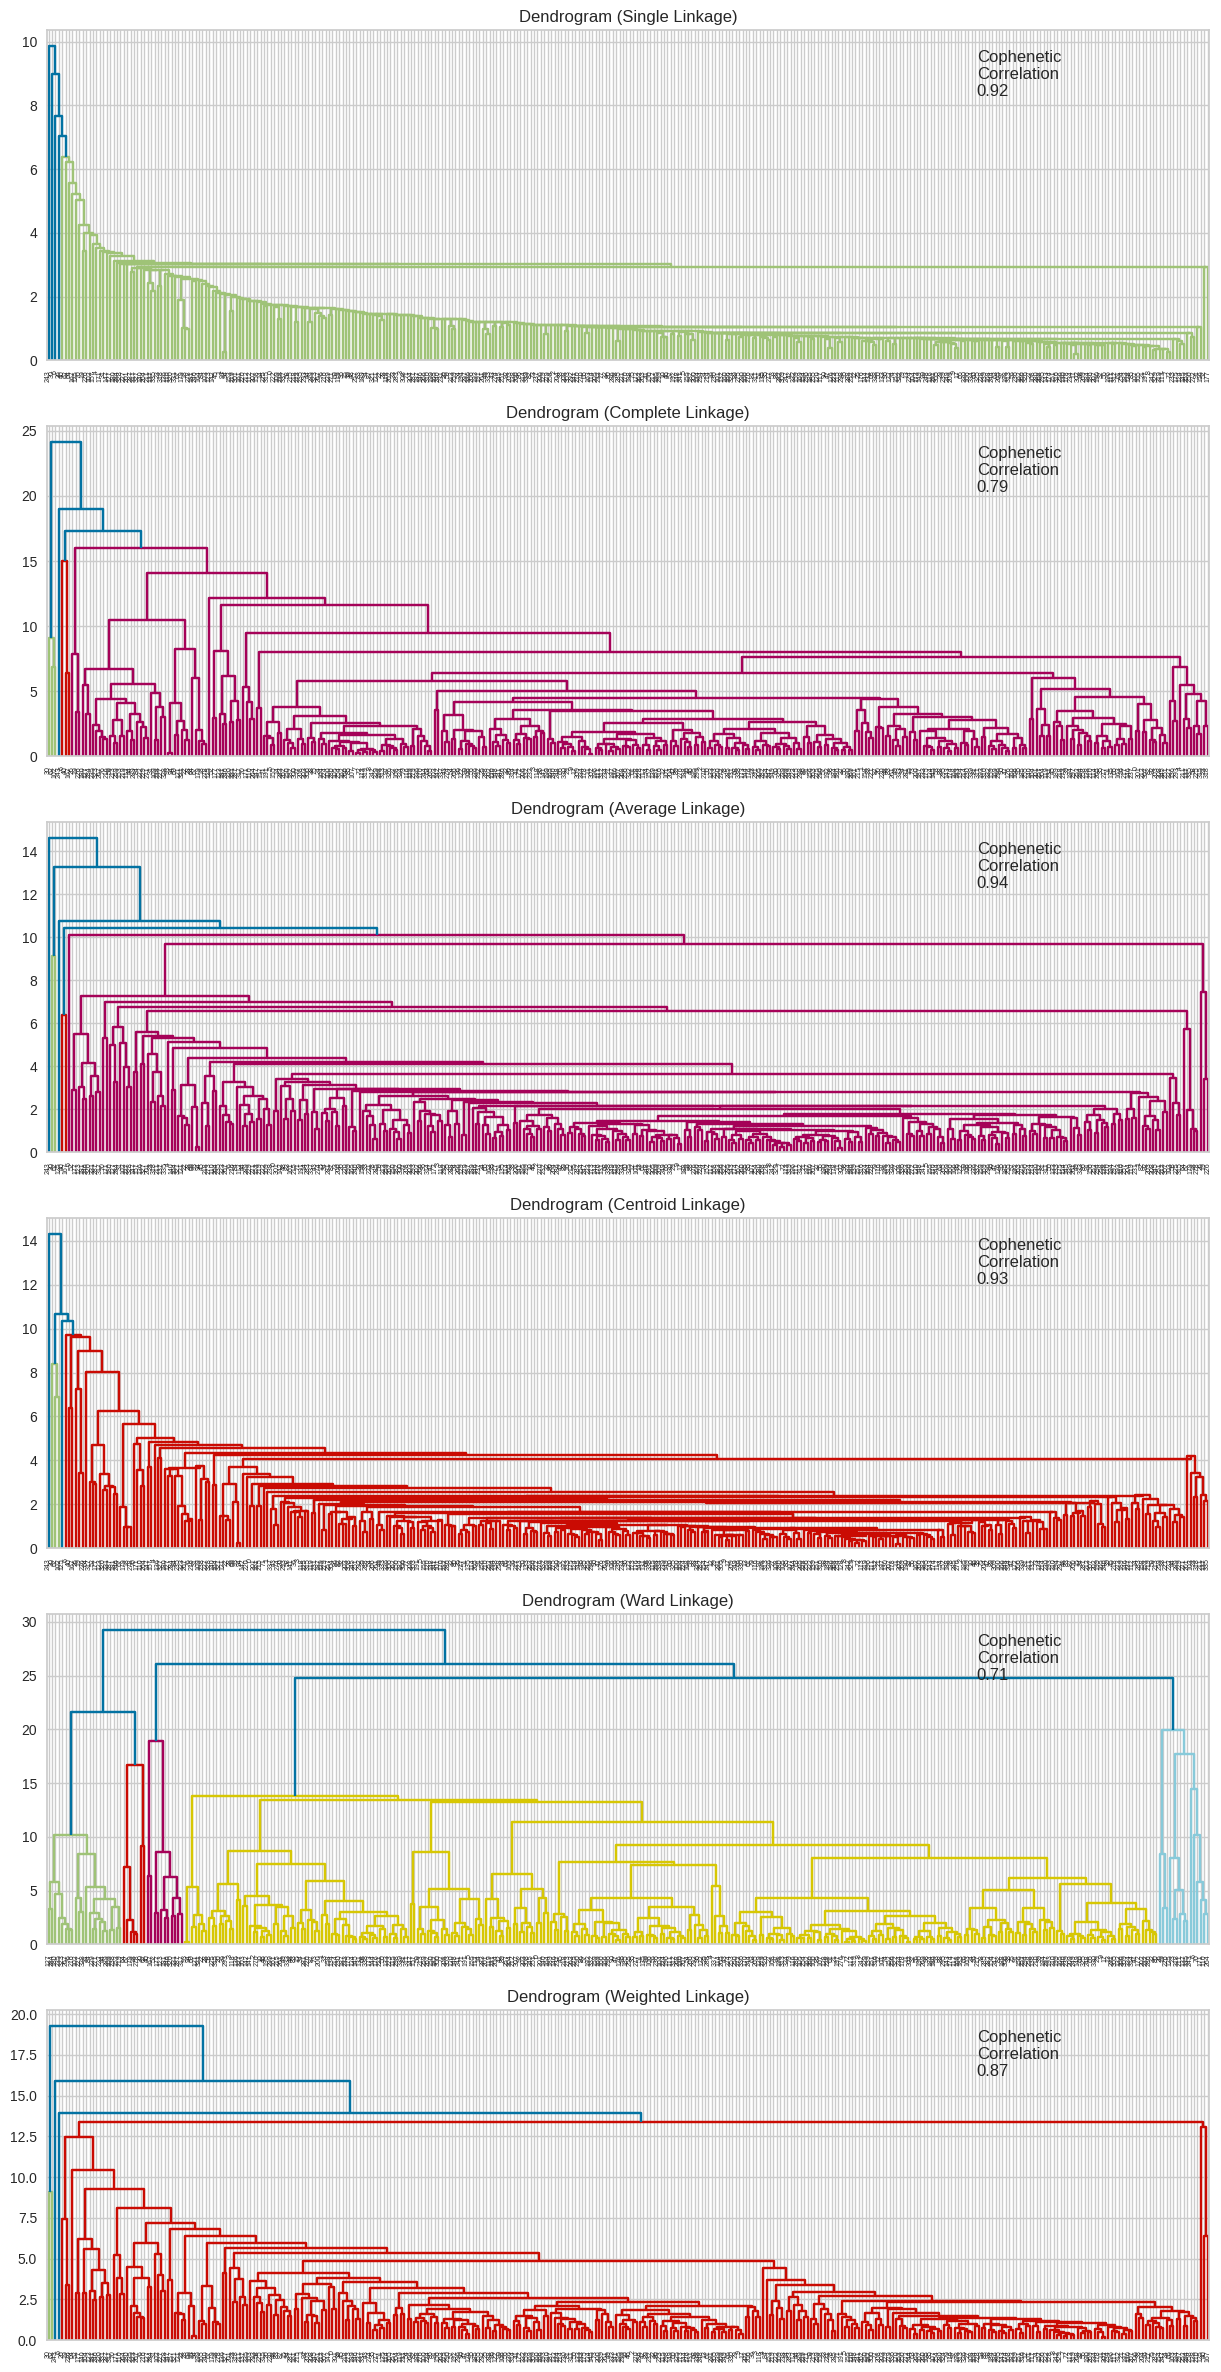

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_scaled_data, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_scaled_data))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

Observations

The cophenetic correlation is highest for average linkage method.
We will move ahead with average linkage.
4 appears to be the appropriate number of clusters from the dendrogram for average linkage.

####Creating Model using sklearn

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="average")
HCmodel.fit(hc_scaled_data)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [ ]:
hc_scaled_data["HC_Clusters"] = HCmodel.labels_
data["HC_Clusters"] = HCmodel.labels_

#### Cluster Profiling

In [ ]:
cluster_profile_hc = hc_scaled_data.groupby("HC_Clusters").mean()

In [ ]:
cluster_profile["count_in_each_segments"] = (
    data.groupby("HC_Clusters")["Security"].count().values
)

In [ ]:
cluster_profile_hc.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
HC_Clusters,,,,,,,,,,,
0,-0.033593,0.005859,-0.017377,-0.045771,-0.031773,0.005952,0.028723,0.019607,-0.005577,-0.006478,-0.003166
1,12.195670,-0.074042,-0.435986,-0.109922,1.262362,-0.888563,0.268653,7.192572,-0.622886,-0.161672,0.047742
2,-0.575803,-1.453888,3.311126,7.908297,-0.210698,-0.693613,-5.236157,-6.778822,-0.068025,0.635362,0.235430
3,0.243055,1.013134,-0.347539,-0.327752,9.834905,0.276029,0.552725,-0.222962,2.632871,1.067680,0.545140


In [ ]:
cluster_profile_hc.style.highlight_min(color="red", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
HC_Clusters,,,,,,,,,,,
0,-0.033593,0.005859,-0.017377,-0.045771,-0.031773,0.005952,0.028723,0.019607,-0.005577,-0.006478,-0.003166
1,12.195670,-0.074042,-0.435986,-0.109922,1.262362,-0.888563,0.268653,7.192572,-0.622886,-0.161672,0.047742
2,-0.575803,-1.453888,3.311126,7.908297,-0.210698,-0.693613,-5.236157,-6.778822,-0.068025,0.635362,0.235430
3,0.243055,1.013134,-0.347539,-0.327752,9.834905,0.276029,0.552725,-0.222962,2.632871,1.067680,0.545140


In [ ]:
# let's see the names of the countries in each cluster
for cl in data["HC_Clusters"].unique():
    print("In cluster {}, the following Companies are present:".format(cl))
    print(data[data["HC_Clusters"] == cl]["Security"].unique())
    print()

In cluster 0, the following Companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'Baker Hughes Inc' 'BIOGEN IDEC I

We see that there are 4 clusters, 1 cluster of two companies, and two clusters with one comapny in each. all the other countries are grouped into another cluster.


In [ ]:
data.groupby(["HC_Clusters", "GICS Sector"])['Security'].count()

HC_Clusters  GICS Sector                
0            Consumer Discretionary         39
             Consumer Staples               19
             Energy                         28
             Financials                     49
             Health Care                    40
             Industrials                    53
             Information Technology         32
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
1            Consumer Discretionary          1
2            Energy                          2
3            Information Technology          1
Name: Security, dtype: int64

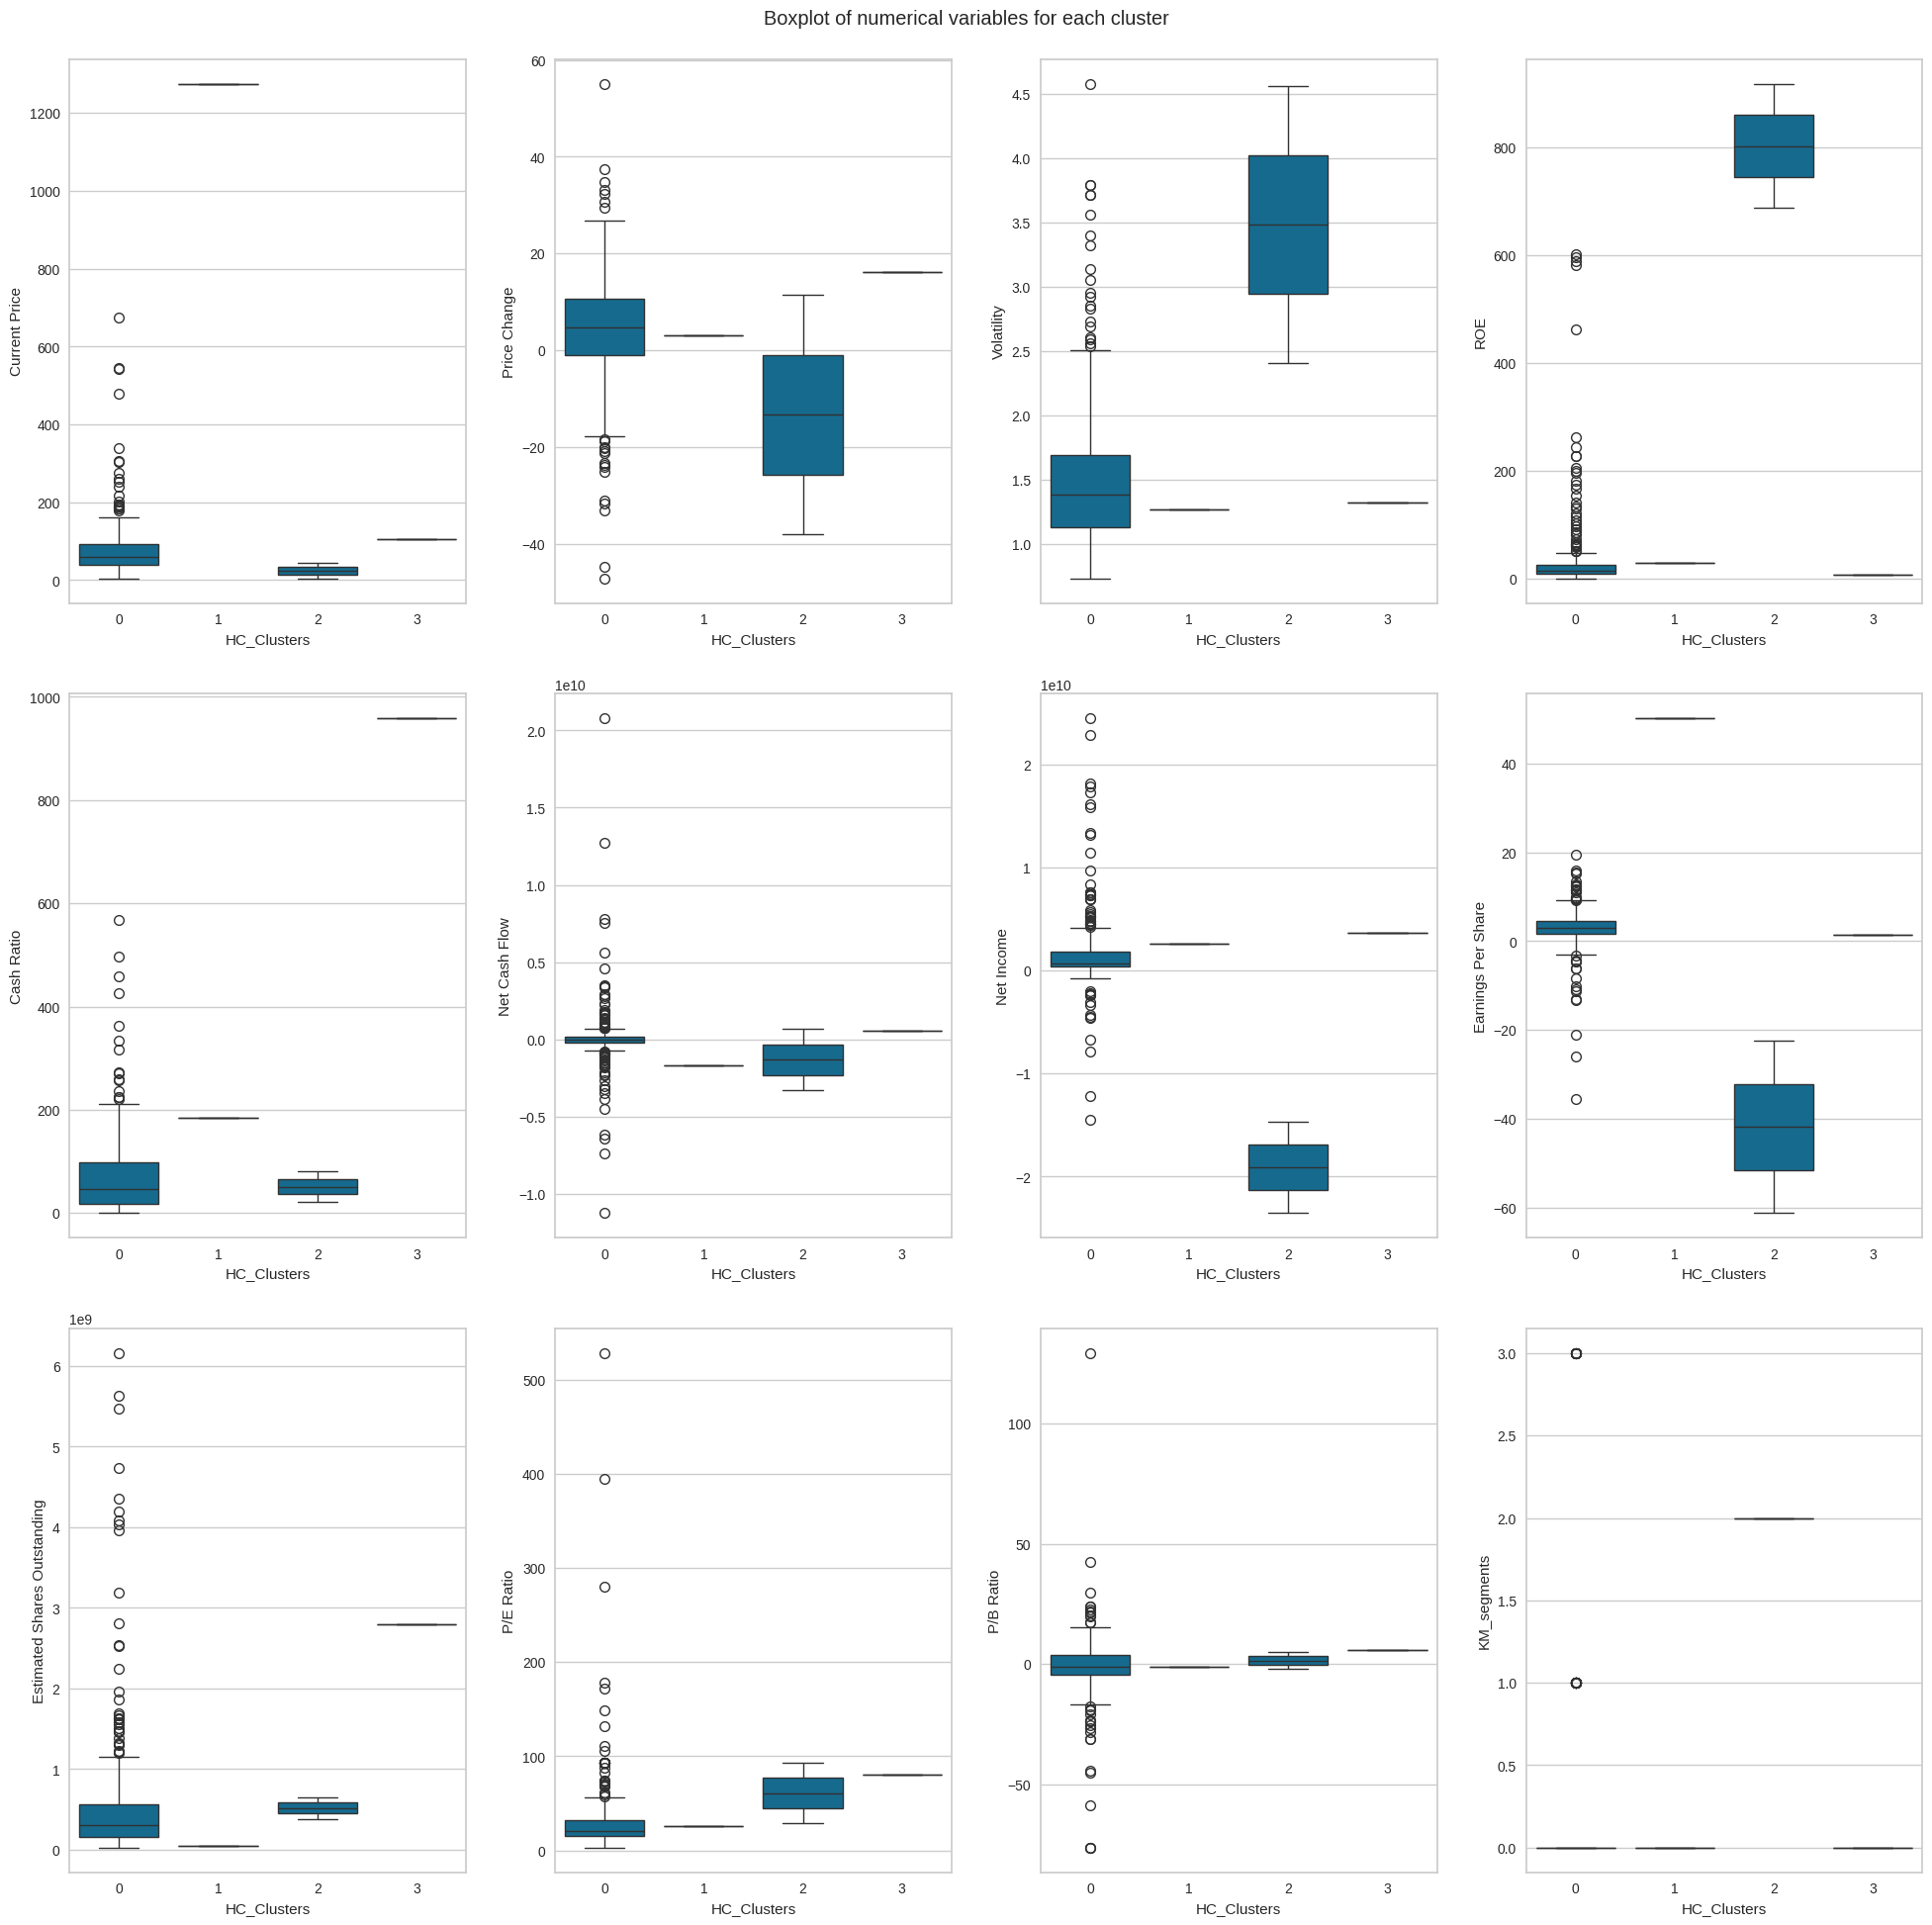

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=data, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

**1. Execution Time Comparison**

**KMeans**: Efficient and fast, especially for larger datasets due to iterative centroid updates.

**Hierarchical Clustering**: Slower, especially as dendrograms are built and cophenetic correlations are calculated across 6 linkage methods.

KMeans is faster and more scalable.



**2. Number of Clusters and Cluster Quality**

Both techniques were run with n_clusters = 4

Silhouette Score (KMeans): Used visualizers for k=5, 8, 9, and finally selected k=4.

Cophenetic Correlation (HC): Highest score obtained with average linkage, so it was used with Euclidean distance.

KMeans gave clearer segmentation based on silhouette, while HC with average linkage gave better cohesion based on dendrogram structure.

**3. Overlap in Observations**


In [ ]:
pd.crosstab(k_means_data["KM_segments"], hc_scaled_data["HC_Clusters"])


HC_Clusters,0,1,2,3
KM_segments,,,,
0,293,1,0,1
1,32,0,0,0
2,0,0,2,0
3,11,0,0,0


Both KMeans and Hierarchical Clustering selected 4 clusters as optimal based on silhouette analysis and dendrogram inspection.

 KMeans formed tighter, more compact clusters using centroid-based partitioning, ideal for faster execution and clear segmentation. Hierarchical Clustering used average linkage with Euclidean distance and produced a visually interpretable dendrogram but took more time due to multiple linkage evaluations. KMeans is more scalable, while hierarchical is better for understanding nested group structures. Both identified 4 clusters, but KMeans gave more distinct boundaries.

## Actionable Insights and Recommendations

-



 **Actionable Insights:**

1. **Cluster Diversity**: Both methods identified 4 unique customer segments with varied behaviors — from high-value frequent users to low-engagement groups.
2. **High-Value Segment**: One cluster shows higher averages in key metrics (e.g., purchases, engagement). These are your **premium or loyal customers**.
3. **Low-Engagement Cluster**: A distinct group has low interaction — likely at risk of churn or inactive users.
4. **Overlap Consistency**: A good degree of consistency in cluster assignments between both algorithms builds confidence in segmentation accuracy.



**Business Recommendations:**

1. **Prioritize High-Value Customers**: Design loyalty programs, premium services, or early-access offers for this cluster to maximize revenue retention.
2. **Engage Low-Value Users**: Use targeted marketing campaigns (email offers, discounts) to activate low-engagement users or understand churn reasons.
3. **Automate with KMeans**: For deployment and scaling, use **KMeans** for real-time segmentation due to its speed and ease of use.
4. **Use HC for Strategic Analysis**: Leverage **Hierarchical Clustering** for in-depth analysis or to explain patterns to stakeholders using dendrograms.
5. **Tailor Offerings per Cluster**: Create personalized content, promotions, or communication strategies for each cluster to improve engagement and conversion.

